In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [4]:
dataset = 'kuhar'
# experiment_name = 'convtae_kuhar_old'
data = pd.read_csv(f'../experiments/tae_{dataset}_p100/data.csv')
data.loc[data['score'] < 0,'score'] = 0

with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
    score = yaml.load(f, Loader=yaml.FullLoader)
    score = score['score']
    print(score)

0.6711267605633803


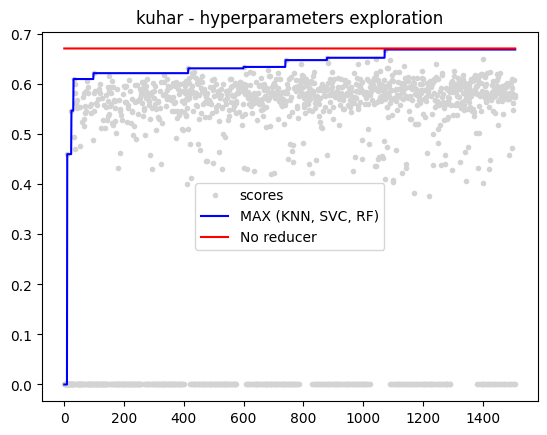

In [5]:
# Plot all data points
plt.title(f'{dataset} - hyperparameters exploration')
plt.plot(data['Unnamed: 0'], data['score'], '.', color='lightgray', label='scores')
plt.plot(data['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
plt.plot(data['Unnamed: 0'], [score]*len(data), color='red', label='No reducer')
plt.legend()

In [6]:
dataset_names = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = [
    {
        'name': name,
        'data_path': f'../experiments/convtae_{name}_old/data.csv',
        'no_reducer_path': f'../execute_once_experiments/scores/no_reducer_{name}.yaml'
    }
    for name in dataset_names]
print(datasets)


[{'name': 'kuhar', 'data_path': '../experiments/convtae_kuhar_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_kuhar.yaml'}, {'name': 'motionsense', 'data_path': '../experiments/convtae_motionsense_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_motionsense.yaml'}, {'name': 'uci', 'data_path': '../experiments/convtae_uci_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_uci.yaml'}, {'name': 'wisdm', 'data_path': '../experiments/convtae_wisdm_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_wisdm.yaml'}, {'name': 'realworld_thigh', 'data_path': '../experiments/convtae_realworld_thigh_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_realworld_thigh.yaml'}, {'name': 'realworld_waist', 'data_path': '../experiments/convtae_realworld_waist_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_realworld_waist

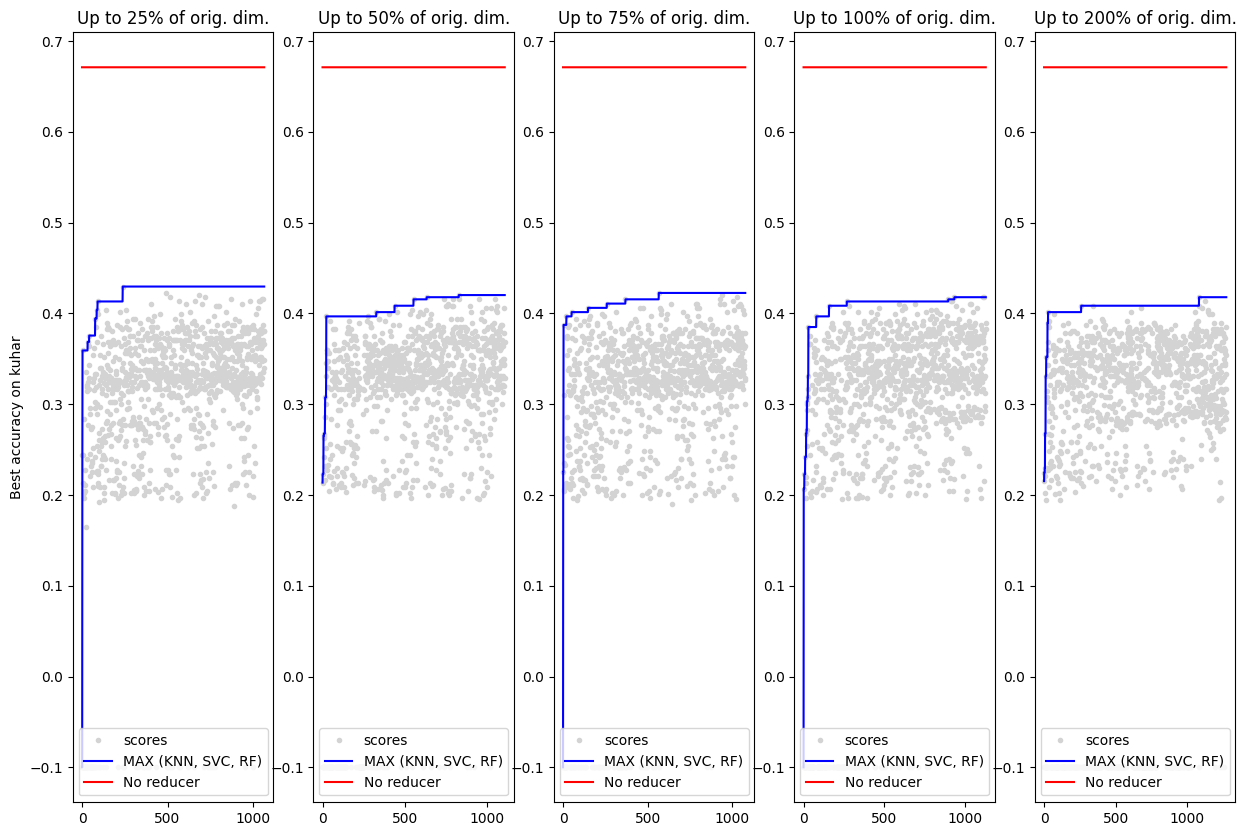

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/umap_realworld_waist_p100/data.csv'

In [21]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = ['kuhar', 'motionsense', 'realworld_thigh', 'realworld_waist']

# Subplots for each dataset
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, dataset in enumerate(datasets):
    # print(i, i%6)
    data25 = pd.read_csv(f'../experiments/umap_{dataset}_p25/data.csv')
    data50 = pd.read_csv(f'../experiments/umap_{dataset}_p50/data.csv')
    data75 = pd.read_csv(f'../experiments/umap_{dataset}_p75/data.csv')
    data100 = pd.read_csv(f'../experiments/umap_{dataset}_p100/data.csv')
    data200 = pd.read_csv(f'../experiments/umap_{dataset}_p200/data.csv')
    
    with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score = yaml.load(f, Loader=yaml.FullLoader)
        score = score['score']
    axs[0].set_title(f'Up to 25% of orig. dim.')
    axs[0].plot(data25['Unnamed: 0'], data25['score'], '.', color='lightgray', label='scores')
    axs[0].plot(data25['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[0].plot(data25['Unnamed: 0'], [score]*len(data25), color='red', label='No reducer')
    axs[0].legend(loc='lower center')
    axs[0].set_ylabel(f'Best accuracy on {dataset}')
    axs[1].set_title(f'Up to 50% of orig. dim.')
    axs[1].plot(data50['Unnamed: 0'], data50['score'], '.', color='lightgray', label='scores')
    axs[1].plot(data50['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[1].plot(data50['Unnamed: 0'], [score]*len(data50), color='red', label='No reducer')
    axs[1].legend(loc='lower center')
    axs[2].set_title(f'Up to 75% of orig. dim.')
    axs[2].plot(data75['Unnamed: 0'], data75['score'], '.', color='lightgray', label='scores')
    axs[2].plot(data75['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[2].plot(data75['Unnamed: 0'], [score]*len(data75), color='red', label='No reducer')
    axs[2].legend(loc='lower center')
    axs[3].set_title(f'Up to 100% of orig. dim.')
    axs[3].plot(data100['Unnamed: 0'], data100['score'], '.', color='lightgray', label='scores')
    axs[3].plot(data100['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[3].plot(data100['Unnamed: 0'], [score]*len(data100), color='red', label='No reducer')
    axs[3].legend(loc='lower center')
    axs[4].set_title(f'Up to 200% of orig. dim.')
    axs[4].plot(data200['Unnamed: 0'], data200['score'], '.', color='lightgray', label='scores')
    axs[4].plot(data200['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[4].plot(data200['Unnamed: 0'], [score]*len(data200), color='red', label='No reducer')
    axs[4].legend(loc='lower center')
    plt.show()

(0.0, 1.0)

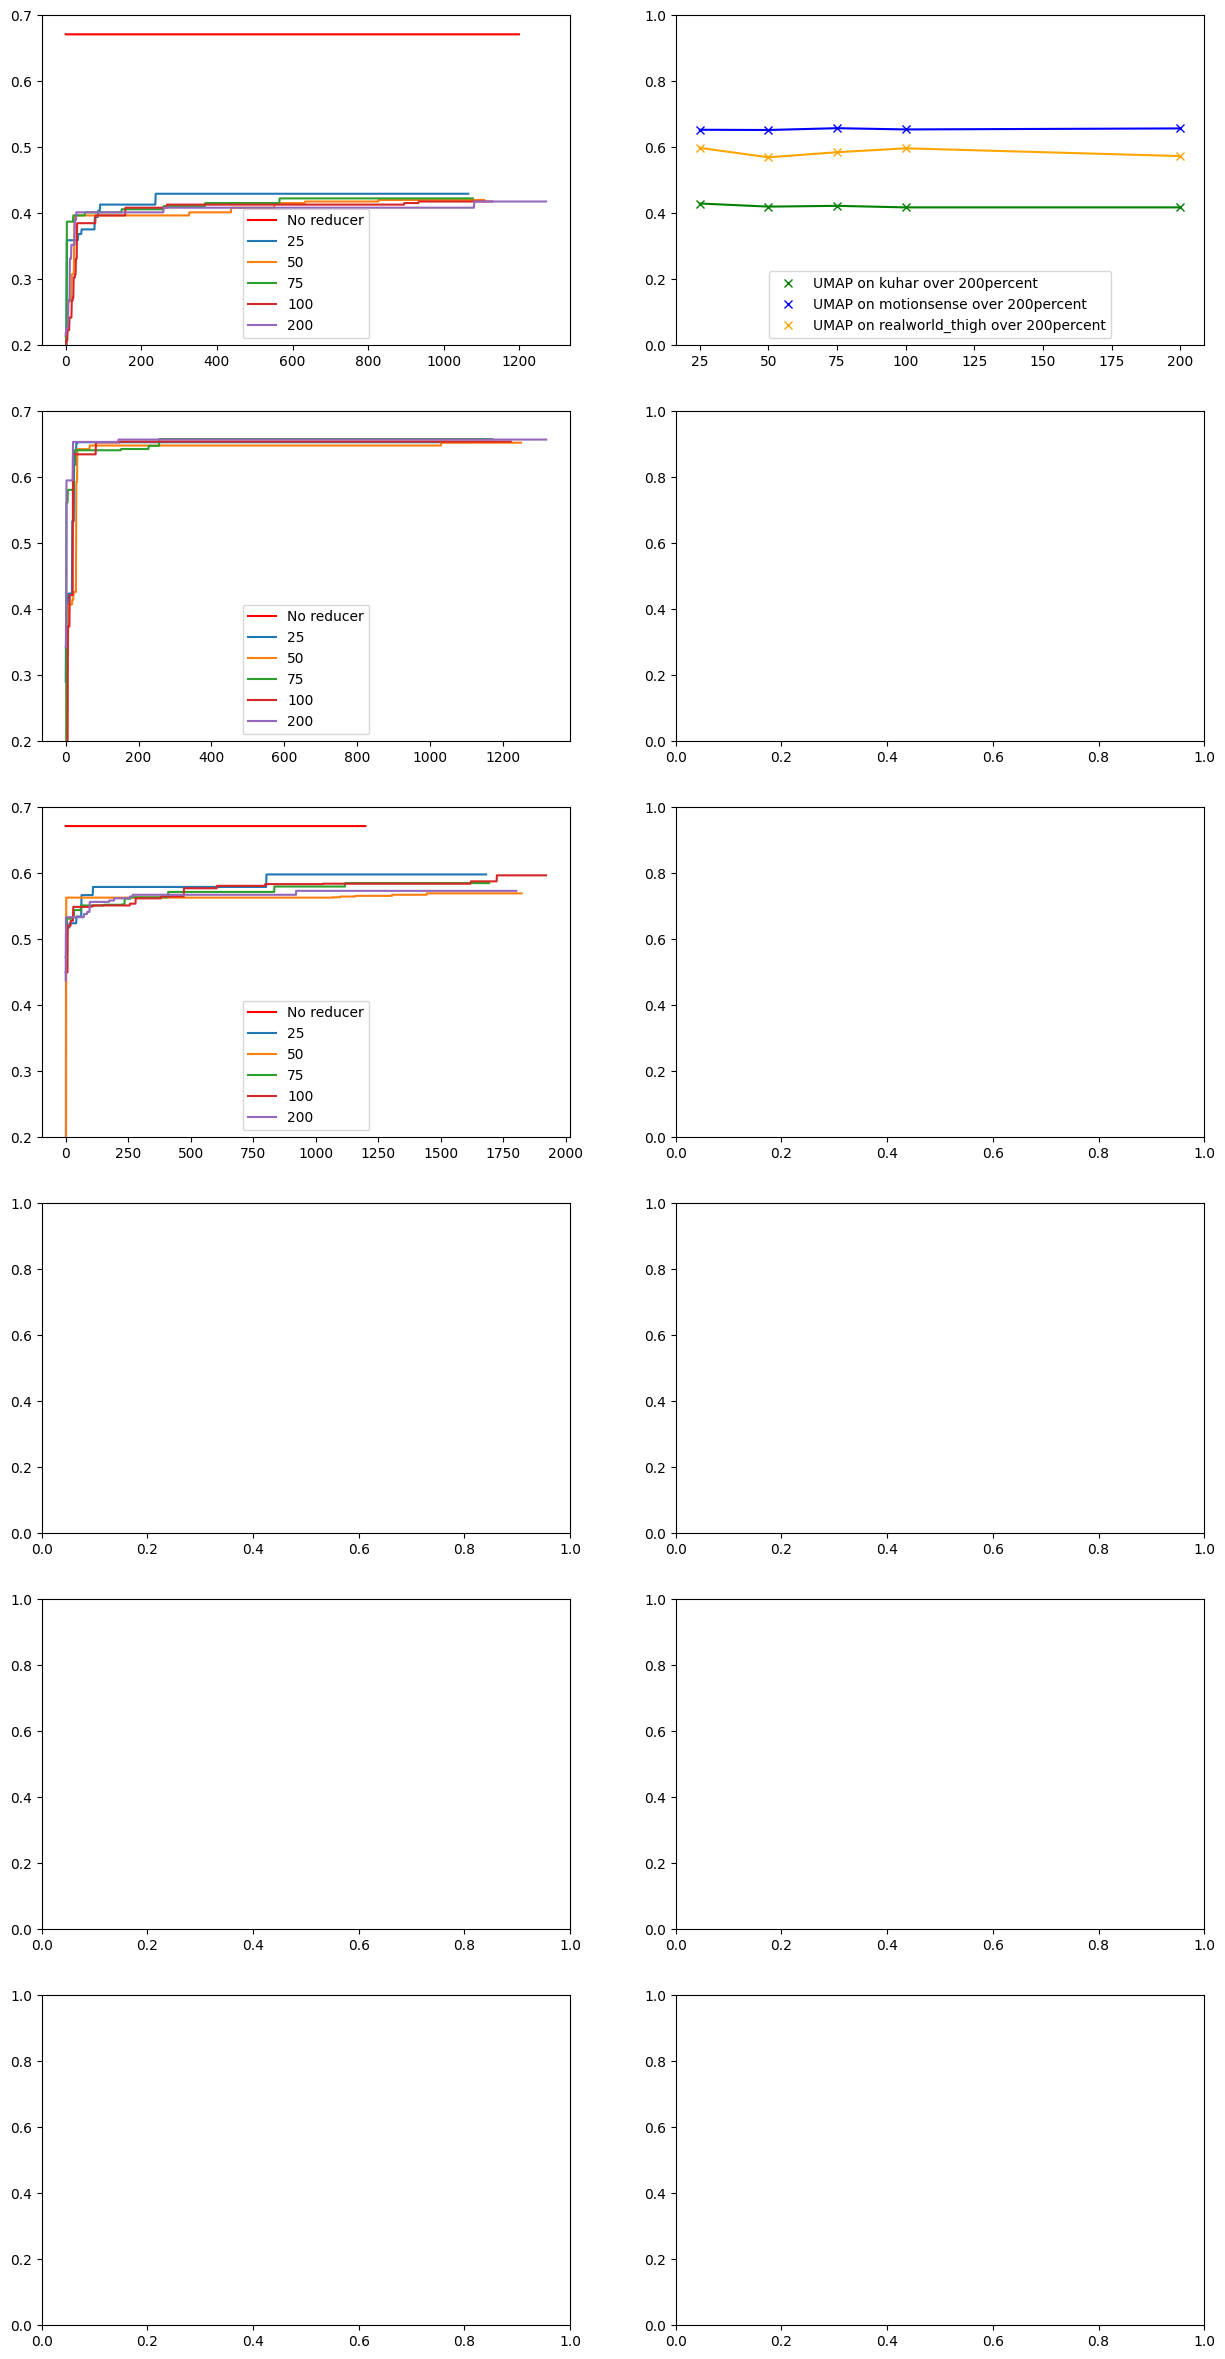

In [18]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = ['kuhar', 'motionsense', 'realworld_thigh']
colors = ['green', 'blue', 'orange', 'red', 'purple', 'brown']
percentages = [25, 50, 75, 100, 200]

# Subplots for each dataset
fig, axs = plt.subplots(6, 2, figsize=(15, 30))
for i, dataset in enumerate(datasets):
    with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score_no_reducer = yaml.load(f, Loader=yaml.FullLoader)
        score_no_reducer = score_no_reducer['score']
        axs[i, 0].plot(range(1200), [score_no_reducer]*1200, color='red', label='No reducer')
    
    best_scores = []
    for p in percentages:
        data = pd.read_csv(f'../experiments/umap_{dataset}_p{p}/data.csv')
        best_scores.append(data['score'].max())
        axs[i, 0].plot(data['score'].cummax(), label=f'{p}')
    axs[0, 1].plot(percentages, best_scores, color=colors[i])
    axs[0, 1].plot(percentages, best_scores, 'x', label=f'UMAP on {dataset} over {p}percent', color=colors[i])
    axs[i, 0].set_ylim([0.2, 0.7])
    axs[i, 0].legend(loc='lower center')
axs[0, 1].legend(loc='lower center')
axs[0, 1].set_ylim([0, 1])

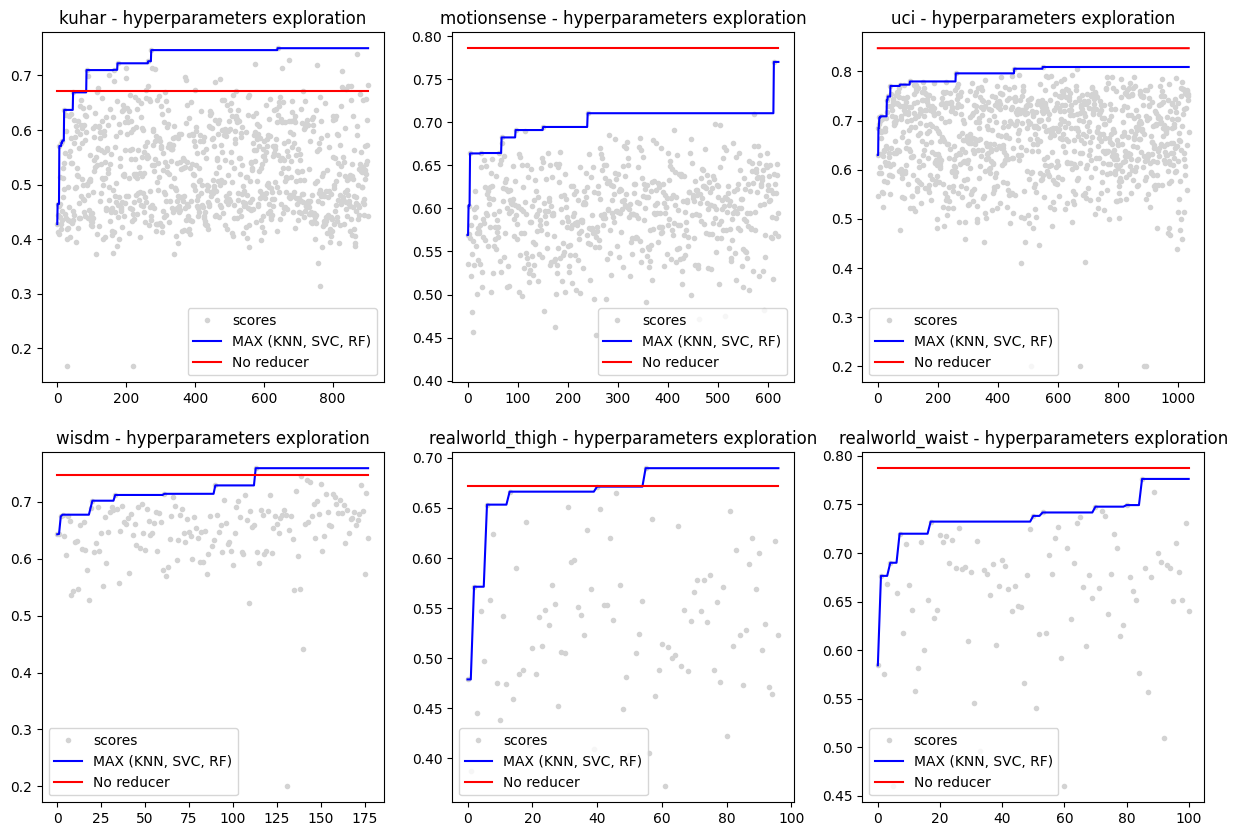

In [ ]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
# Subplots for each dataset
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, dataset in enumerate(datasets):
    data = pd.read_csv(f'../experiments/convtae_{dataset}_old/data.csv')
    with open(f'../execute_once_experiments/scores/no_reducer_{dataset}.yaml') as f:
        score = yaml.load(f, Loader=yaml.FullLoader)
        score = score['score']
    axs[i//3, i%3].set_title(f'{dataset} - hyperparameters exploration')
    axs[i//3, i%3].plot(data['Unnamed: 0'], data['score'], '.', color='lightgray', label='scores')
    axs[i//3, i%3].plot(data['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[i//3, i%3].plot(data['Unnamed: 0'], [score]*len(data), color='red', label='No reducer')
    axs[i//3, i%3].legend()

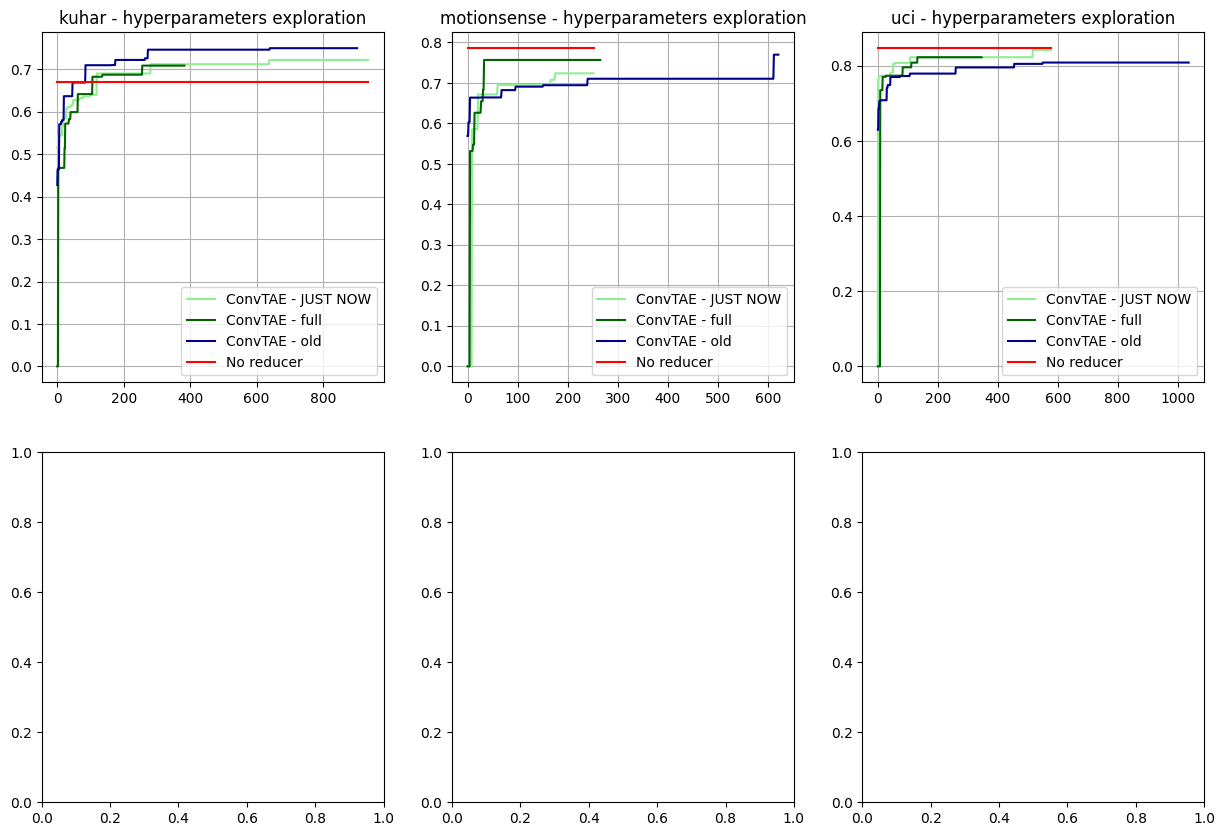

In [ ]:
datasets = ['kuhar', 'motionsense', 'uci']#, 'wisdm', 'realworld_thigh', 'realworld_waist']
# Subplots for each dataset
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, dataset in enumerate(datasets):
    data_full = pd.read_csv(f'../experiments/convtae_{dataset}_full/data.csv')
    data_full.loc[data_full['score'] < 0,'score'] = 0
    data = pd.read_csv(f'../experiments/convtae_{dataset}/data.csv')
    data.loc[data['score'] < 0,'score'] = 0
    data_umap = pd.read_csv(f'../experiments/umap_{dataset}/data.csv')
    data_umap.loc[data_umap['score'] < 0,'score'] = 0
    data_old = pd.read_csv(f'../experiments/convtae_{dataset}_old/data.csv')
    data_old.loc[data_old['score'] < 0,'score'] = 0
    with open(f'../execute_once_experiments/scores/no_reducer_{dataset}.yaml') as f:
        score = yaml.load(f, Loader=yaml.FullLoader)
        score = score['score']
    axs[i//3, i%3].set_title(f'{dataset} - hyperparameters exploration')
    # axs[i//3, i%3].plot(data['Unnamed: 0'], data['score'], '.', color='lightgray', label='scores')
    # axs[i//3, i%3].plot(data_old['Unnamed: 0'], data_old['score'], '.', color='darkgray', label='scores')
    axs[i//3, i%3].plot(data['score'].cummax(), color='lightgreen', label='ConvTAE - JUST NOW')
    axs[i//3, i%3].plot(data_full['score'].cummax(), color='darkgreen', label='ConvTAE - full')
    # axs[i//3, i%3].plot(data_umap['score'].cummax(), color='lightgreen', label='UMAP')
    axs[i//3, i%3].plot(data_old['score'].cummax(), color='darkblue', label='ConvTAE - old')
    axs[i//3, i%3].plot(data['Unnamed: 0'], [score]*len(data), color='red', label='No reducer')
    axs[i//3, i%3].legend()
    axs[i//3, i%3].grid()

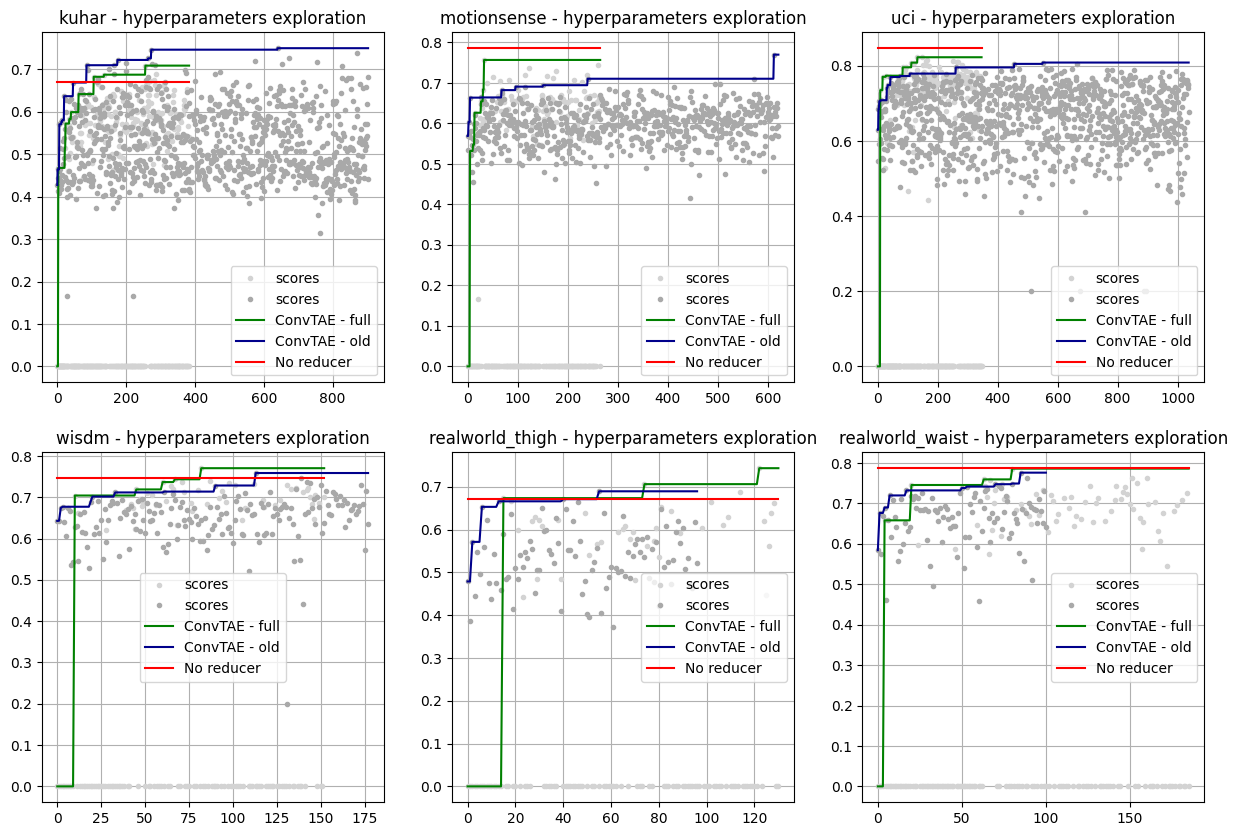

In [ ]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
# Subplots for each dataset
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, dataset in enumerate(datasets):
    data = pd.read_csv(f'../experiments/convtae_{dataset}_full/data.csv')
    data.loc[data['score'] < 0,'score'] = 0
    # data_umap = pd.read_csv(f'../experiments/umap_{dataset}/data.csv')
    # data_umap.loc[data_umap['score'] < 0,'score'] = 0
    data_old = pd.read_csv(f'../experiments/convtae_{dataset}_old/data.csv')
    data_old.loc[data_old['score'] < 0,'score'] = 0
    with open(f'../execute_once_experiments/scores/no_reducer_{dataset}.yaml') as f:
        score = yaml.load(f, Loader=yaml.FullLoader)
        score = score['score']
    axs[i//3, i%3].set_title(f'{dataset} - hyperparameters exploration')
    axs[i//3, i%3].plot(data['Unnamed: 0'], data['score'], '.', color='lightgray', label='scores')
    axs[i//3, i%3].plot(data_old['Unnamed: 0'], data_old['score'], '.', color='darkgray', label='scores')
    axs[i//3, i%3].plot(data['score'].cummax(), color='green', label='ConvTAE - full')
    # axs[i//3, i%3].plot(data_umap['score'].cummax(), color='lightgreen', label='UMAP')
    axs[i//3, i%3].plot(data_old['score'].cummax(), color='darkblue', label='ConvTAE - old')
    axs[i//3, i%3].plot(data['Unnamed: 0'], [score]*len(data), color='red', label='No reducer')
    axs[i//3, i%3].legend()
    axs[i//3, i%3].grid()

# Normalization of the scores

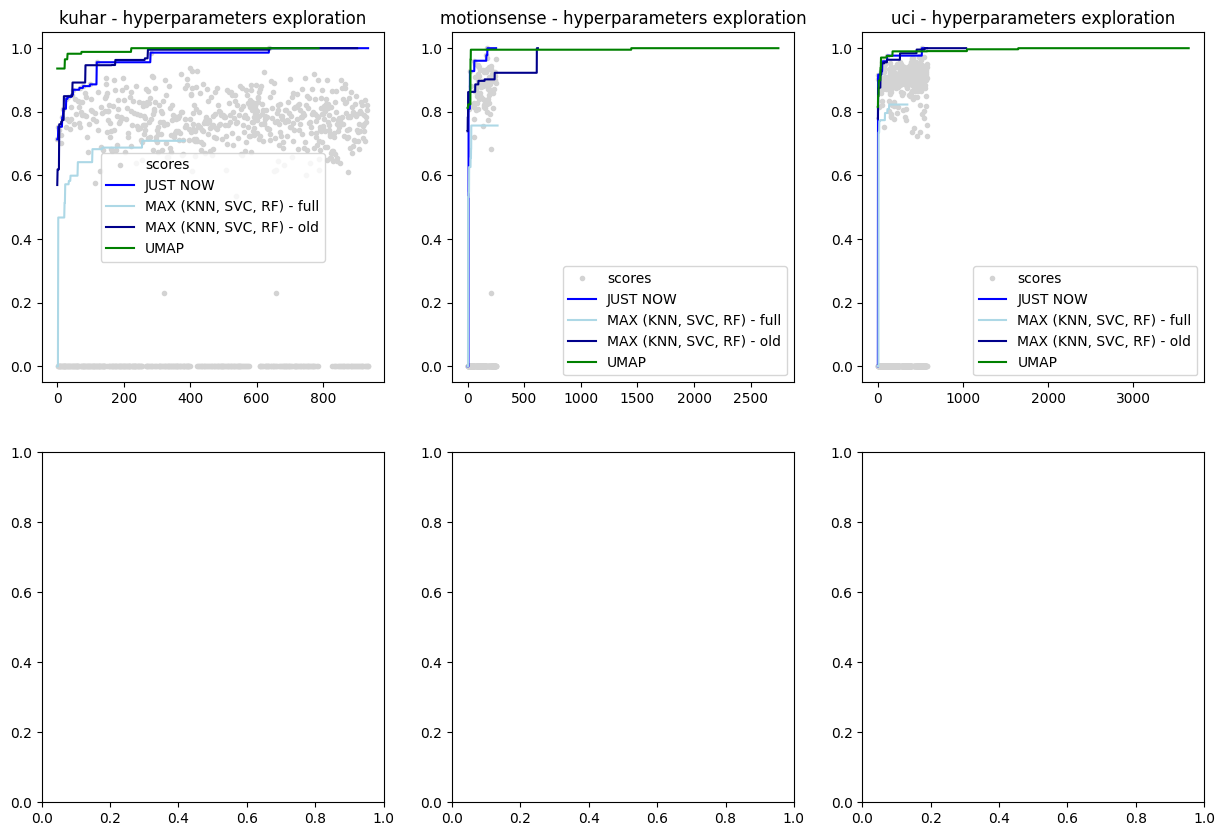

In [ ]:
datasets = ['kuhar', 'motionsense', 'uci']#, 'wisdm', 'realworld_thigh', 'realworld_waist']
# Subplots for each dataset
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, dataset in enumerate(datasets):
    data = pd.read_csv(f'../experiments/convtae_{dataset}/data.csv')
    data.loc[data['score'] < 0,'score'] = 0
    data_full = pd.read_csv(f'../experiments/convtae_{dataset}_full/data.csv')
    data_full.loc[data_full['score'] < 0,'score'] = 0
    # Normalization of score by the max score
    data['score'] = data['score'] / data['score'].max()
    data_umap = pd.read_csv(f'../experiments/umap_{dataset}/data.csv')
    data_umap.loc[data_umap['score'] < 0,'score'] = 0
    # Normalization of score by the max score
    data_umap['score'] = data_umap['score'] / data_umap['score'].max()
    data_old = pd.read_csv(f'../experiments/convtae_{dataset}_old/data.csv')
    data_old.loc[data_old['score'] < 0,'score'] = 0
    data_old['score'] = data_old['score'] / data_old['score'].max()
    # with open(f'../execute_once_experiments/scores/no_reducer_{dataset}.yaml') as f:
    #     score = yaml.load(f, Loader=yaml.FullLoader)
    #     score = score['score']
    axs[i//3, i%3].set_title(f'{dataset} - hyperparameters exploration')
    axs[i//3, i%3].plot(data['Unnamed: 0'], data['score'], '.', color='lightgray', label='scores')
    axs[i//3, i%3].plot(data['score'].cummax(), color='blue', label='JUST NOW')
    axs[i//3, i%3].plot(data_full['score'].cummax(), color='lightblue', label='MAX (KNN, SVC, RF) - full')
    axs[i//3, i%3].plot(data_old['score'].cummax(), color='darkblue', label='MAX (KNN, SVC, RF) - old')
    axs[i//3, i%3].plot(data_umap['score'].cummax(), color='green', label='UMAP')
    # axs[i//3, i%3].plot(data['Unnamed: 0'], [score]*len(data), color='red', label='No reducer')
    axs[i//3, i%3].legend()

#